<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Combinació de classificadors: Stacking</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>PID_00233252</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Xavier Duran Albareda <span style="margin-left: 30px;">Coordinació: Julià Minguillón</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducció

En aquest exemple, adaptat del llibre [Minería de datos, algoritmos y modelos](http://oer.uoc.edu/libroMD/), es mostra com generar un classificador arbre de decisió i com millorar-lo amb la tècnica de [Stacking](http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/).

Les dades analitzades corresponen al _dataset_ [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

### Instal·lar els paquets necessaris en cas de no tenir-los

In [1]:
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(randomForest)){
    install.packages('randomForest',repos='http://cran.es.r-project.org')
    require(ramdomForest)
}
if(!require(caretEnsemble)){
    install.packages('caretEnsemble',repos='http://cran.es.r-project.org')
    require(caretEnsemble)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
if(!require(kernlab)){
    install.packages('kernlab',repos='http://cran.es.r-project.org')
    require(kernlab)
}
if(!require(nnet)){
    install.packages('nnet',repos='http://cran.es.r-project.org')
    require(nnet)
}
set.seed(17)

Loading required package: rpart
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: caretEnsemble

Attaching package: ‘caretEnsemble’

The following object is masked from ‘package:ggplot2’:

    autoplot

Loading required package: C50
Loading required package: plyr
Loading required package: kernlab

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha

Loading required package: nnet


### Càrrega de les dades

In [2]:
wdbc=read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"),
    sep=",",
    header=FALSE
)
dim(wdbc)
dataset <- wdbc[,(2:32)]

[1] 569  32

### Paràmetres de creació del model

Utilitzarem la mètrica _Accuracy_ que mesura el percentatge d'instàncies correctes sobre el total. Farem la validació creuada o _crossvalidation_ amb 10 _folds_.

In [3]:
metric <- "Accuracy"
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions="all", classProbs=TRUE)
algorithmList <- c('nnet', 'rpart', 'C5.0', 'knn', 'svmRadial')

### Creem el nivell 0

In [4]:
models <- caretList(V2~., data=dataset, trControl=control, metric=metric, methodList=algorithmList)

Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”

# weights:  33
initial  value 357.697663 
final  value 338.205383 
converged
# weights:  97
initial  value 359.324078 
final  value 338.205383 
converged
# weights:  161
initial  value 354.226379 
iter  10 value 336.232656
iter  20 value 336.226690
iter  20 value 336.226687
iter  20 value 336.226687
final  value 336.226687 
converged
# weights:  33
initial  value 496.244406 
iter  10 value 338.231892
final  value 338.218999 
converged
# weights:  97
initial  value 344.568397 
iter  10 value 339.285052
iter  20 value 338.222954
iter  30 value 338.215062
iter  40 value 338.214638
iter  50 value 338.213314
iter  60 value 338.213094
final  value 338.212515 
converged
# weights:  161
initial  value 340.025837 
iter  10 value 232.871866
iter  20 value 143.760867
iter  30 value 125.726319
iter  40 value 116.589871
iter  50 value 112.502566
iter  60 value 111.342301
iter  70 value 79.429827
iter  80 value 63.345618
iter  90 value 51.058783
iter 100 value 49.849649
final  value 49.849649 
stopp

initial  value 371.304466 
final  value 338.675483 
converged
# weights:  97
initial  value 400.181964 
final  value 338.673358 
converged
# weights:  161
initial  value 390.294333 
final  value 338.674440 
converged
# weights:  33
initial  value 503.242801 
final  value 338.205383 
converged
# weights:  97
initial  value 496.685481 
final  value 338.205383 
converged
# weights:  161
initial  value 342.258474 
final  value 338.205383 
converged
# weights:  33
initial  value 397.124199 
iter  10 value 338.224152
final  value 338.218999 
converged
# weights:  97
initial  value 421.345714 
iter  10 value 337.984713
iter  20 value 302.985653
iter  30 value 183.627730
iter  40 value 144.658660
iter  50 value 135.771151
iter  60 value 118.751635
iter  70 value 81.757594
iter  80 value 51.431543
iter  90 value 50.122749
final  value 50.122713 
converged
# weights:  161
initial  value 359.545710 
iter  10 value 276.989039
iter  20 value 147.673273
iter  30 value 133.073485
iter  40 value 104.4

initial  value 363.427637 
final  value 338.205383 
converged
# weights:  161
initial  value 484.653152 
final  value 338.205383 
converged
# weights:  33
initial  value 362.273224 
iter  10 value 338.328595
iter  20 value 330.690854
iter  30 value 200.278848
iter  40 value 141.008945
iter  50 value 102.988229
iter  60 value 83.978314
iter  70 value 58.808696
iter  80 value 56.870697
iter  90 value 56.322552
final  value 56.322541 
converged
# weights:  97
initial  value 662.794146 
iter  10 value 336.295239
iter  20 value 188.655041
iter  30 value 147.377058
iter  40 value 135.939064
iter  50 value 120.884769
iter  60 value 76.379070
iter  70 value 52.137654
iter  80 value 49.182834
iter  90 value 48.745840
iter 100 value 48.411361
final  value 48.411361 
stopped after 100 iterations
# weights:  161
initial  value 357.817116 
iter  10 value 335.967171
iter  20 value 292.977809
iter  30 value 225.752498
iter  40 value 154.277392
iter  50 value 118.136634
iter  60 value 108.945038
iter 

initial  value 339.581943 
final  value 338.205383 
converged
# weights:  97
initial  value 390.225199 
final  value 338.205383 
converged
# weights:  161
initial  value 338.685472 
final  value 338.205383 
converged
# weights:  33
initial  value 348.334782 
iter  10 value 332.292953
iter  20 value 190.154297
iter  30 value 146.197547
iter  40 value 140.536956
iter  50 value 111.650958
iter  60 value 85.527739
iter  70 value 58.072220
iter  80 value 51.534153
final  value 51.532031 
converged
# weights:  97
initial  value 351.704806 
iter  10 value 337.989247
iter  20 value 316.958454
iter  30 value 310.807338
iter  40 value 304.796493
iter  50 value 171.108869
iter  60 value 152.906496
iter  70 value 116.660415
iter  80 value 101.626075
iter  90 value 100.810054
iter 100 value 97.217444
final  value 97.217444 
stopped after 100 iterations
# weights:  161
initial  value 417.964218 
iter  10 value 204.253717
iter  20 value 146.268050
iter  30 value 144.831223
iter  40 value 124.401954
i

initial  value 342.367980 
iter  10 value 151.042784
iter  20 value 147.630681
iter  30 value 147.615984
iter  40 value 145.404413
iter  50 value 143.393938
iter  60 value 142.838279
iter  70 value 134.431626
iter  80 value 103.973865
iter  90 value 100.271530
iter 100 value 99.178327
final  value 99.178327 
stopped after 100 iterations
# weights:  97
initial  value 472.806476 
iter  10 value 135.686504
iter  20 value 122.329560
iter  30 value 116.079261
iter  40 value 113.387074
iter  50 value 112.712411
iter  60 value 112.647848
iter  70 value 112.614074
iter  80 value 112.613368
final  value 112.613352 
converged
# weights:  161
initial  value 401.775283 
final  value 338.205383 
converged
# weights:  33
initial  value 366.893642 
iter  10 value 338.003558
iter  20 value 143.410804
iter  30 value 137.190737
iter  40 value 108.323079
iter  50 value 68.005496
iter  60 value 54.622167
iter  70 value 54.388018
final  value 54.387983 
converged
# weights:  97
initial  value 365.653473 
i

initial  value 445.494128 
iter  10 value 337.773752
iter  20 value 337.499096
iter  30 value 336.670370
iter  40 value 300.927270
iter  50 value 273.985339
iter  60 value 158.963155
iter  70 value 115.281697
iter  80 value 101.273054
iter  90 value 88.478160
iter 100 value 58.847654
final  value 58.847654 
stopped after 100 iterations
# weights:  33
initial  value 425.777131 
final  value 337.682536 
converged
# weights:  97
initial  value 376.210385 
final  value 337.683560 
converged
# weights:  161
initial  value 346.237127 
iter  10 value 273.425278
iter  20 value 233.779596
iter  30 value 216.237209
iter  40 value 216.233154
iter  50 value 186.141010
iter  60 value 185.216326
iter  70 value 185.198124
iter  80 value 185.178907
iter  90 value 185.178179
iter 100 value 161.988728
final  value 161.988728 
stopped after 100 iterations
# weights:  33
initial  value 353.579307 
final  value 338.671686 
converged
# weights:  97
initial  value 343.008258 
final  value 338.671686 
converg

initial  value 419.790322 
final  value 338.205894 
converged
# weights:  97
initial  value 366.567313 
final  value 338.206950 
converged
# weights:  161
initial  value 350.036224 
final  value 338.208133 
converged
# weights:  161
initial  value 413.843786 
iter  10 value 375.590244
iter  20 value 332.185254
iter  30 value 166.618724
iter  40 value 153.174121
iter  50 value 150.304408
iter  60 value 133.948086
iter  70 value 114.758288
iter  80 value 80.239821
iter  90 value 60.300768
iter 100 value 52.158844
final  value 52.158844 
stopped after 100 iterations


###  Mostrem les característiques del model

In [5]:
models

$nnet
Neural Network 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 511, 512, 512, 513, 512, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa     
  1     0e+00  0.6747908  0.13406377
  1     1e-04  0.6357557  0.02400000
  1     1e-01  0.8125828  0.50874448
  3     0e+00  0.7126264  0.24124798
  3     1e-04  0.6461358  0.05232068
  3     1e-01  0.9267818  0.82891238
  5     0e+00  0.7134982  0.24411617
  5     1e-04  0.7368057  0.30781970
  5     1e-01  0.9436774  0.87747716

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 5 and decay = 0.1.

$rpart
CART 

569 samples
 30 predictor
  2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 512, 511, 512, 512, 513, 512, ... 
Resampling results across tuning para

In [6]:
results.N0 <- resamples(models)
summary(results.N0)


Call:
summary.resamples(object = results.N0)

Models: nnet, rpart, C5.0, knn, svmRadial 
Number of resamples: 30 

Accuracy 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
nnet      0.8214286 0.9310345 0.9562808 0.9436774 0.9649123 0.9824561    0
rpart     0.8571429 0.9122807 0.9298246 0.9284296 0.9473684 1.0000000    0
C5.0      0.8928571 0.9473684 0.9649123 0.9636465 0.9824561 1.0000000    0
knn       0.8928571 0.9174877 0.9298246 0.9320114 0.9473684 0.9824561    0
svmRadial 0.9298246 0.9644424 0.9822995 0.9719061 0.9824561 1.0000000    0

Kappa 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
nnet      0.5789474 0.8521947 0.9061103 0.8774772 0.9246032 0.9626719    0
rpart     0.6831683 0.8142586 0.8500530 0.8463765 0.8874547 1.0000000    0
C5.0      0.7623762 0.8880157 0.9234432 0.9215785 0.9621791 1.0000000    0
knn       0.7623762 0.8246362 0.8498368 0.8531854 0.8857108 0.9619238    0
svmRadial 0.8492063 0.9230769 0.9619238 0

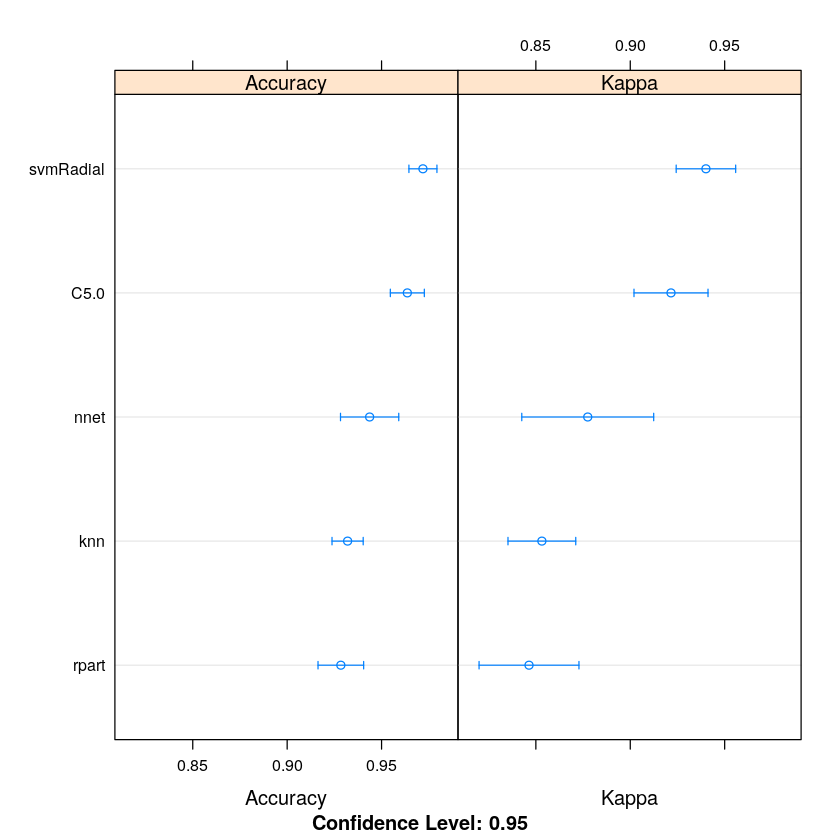

In [7]:
dotplot(results.N0)

### Revisem la correlació entre els diferents models

,nnet,rpart,C5.0,knn,svmRadial
nnet,1.00000000,0.2971017,0.1288437,0.05219935,-0.1431716
rpart,0.29710165,1.0000000,0.3708069,0.20747662,0.3180995
C5.0,0.12884375,0.3708069,1.0000000,0.23719576,0.5553513
knn,0.05219935,0.2074766,0.2371958,1.00000000,0.1313860
svmRadial,-0.14317156,0.3180995,0.5553513,0.13138599,1.0000000


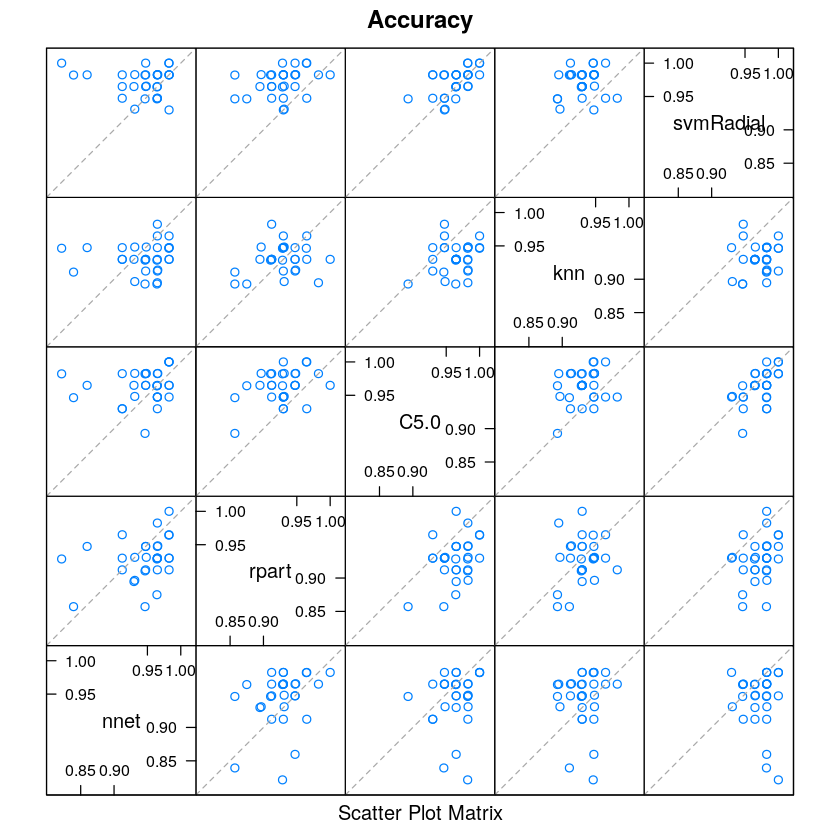

In [8]:
modelCor(results.N0)
splom(results.N0)

### Construcció del model final

### Paràmetres de construcció

In [9]:
stackControl <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE)

### Creació del model

In [10]:
N1.rf <- caretStack(models, method="rf", metric="Accuracy", trControl=stackControl)

###  Mostrem les característiques del model final

In [11]:
print(N1.rf)

A rf ensemble of 2 base models: nnet, rpart, C5.0, knn, svmRadial

Ensemble results:
Random Forest 

1707 samples
   5 predictor
   2 classes: 'B', 'M' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1535, 1537, 1536, 1537, 1537, 1537, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9851633  0.9681497
  3     0.9851621  0.9681506
  5     0.9837942  0.9652048

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->